In [6]:
%%capture
%run shared.ipynb

## Visualizing queer identities

Kira M. Del Mar (2021)

This is an interactive [Voilà](https://github.com/voila-dashboards/voila/blob/master/README.md) dashboard view of a [Jupyter Notebook](https://jupyter.org), with data from the national survey "Is the library for everyone? LGBTQIA+ people's attitudes toward and experiences with public libraries in Norway." 
You probably found your way here via <a href="http://BibliotekForAlle.carrd.co" target="_blank">BibliotekForAlle.carrd.co</a>, but if not, you can visit the carrd for supplementary material.

### Allowing for complexity
Statistical analysis generally requires neat categories, but queer identities are seldom neat and tidy. Rather than force respondents to choose only one orientation, I allowed for for multiple choices, and in this notebook-in-progress, I have been working on different ways to visualize the complexity of queer identities. 

<img src="figs/engelsk.png" alt="Screenshot from the survey showing choices of eight different orientations" width="750"/>


### Total respondents vs total responses

<font color=Gray>When grouping survey respondents by orientation, I faced a choice between creating mutually exclusive groups that included under half of the respondents (about 40% chose only one label for their orientation), or creating overlapping groups that included about twice as many data points as there were respondents.</font>

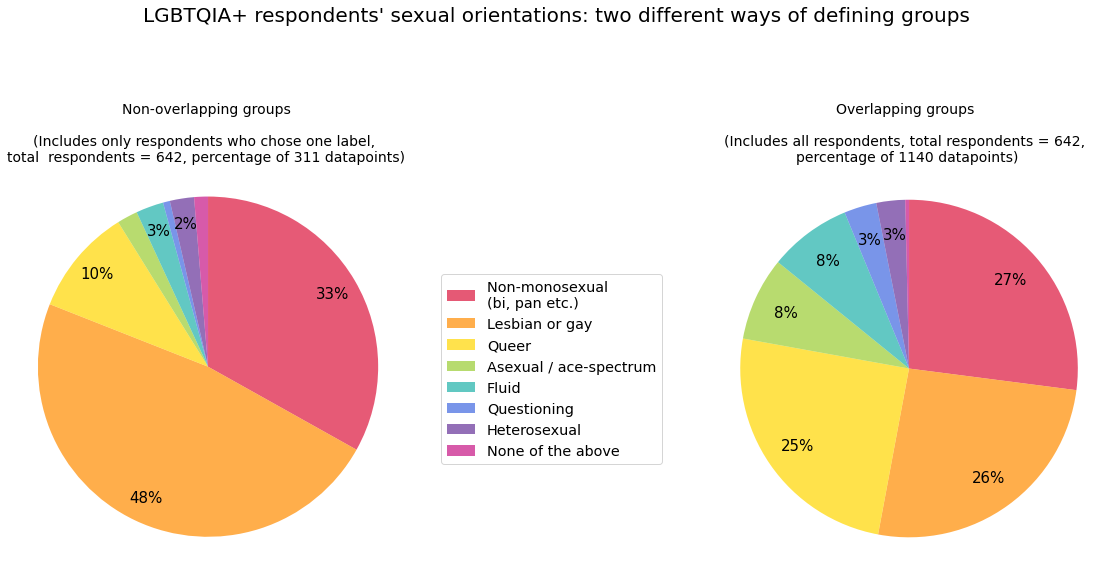

In [71]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def my_autopct(pct):
    if pct >= 2:
        return f'{pct:.0f}%'
    else:
        return None


labels = 'Non-monosexual \n(bi, pan etc.)', 'Lesbian or gay', 'Queer', 'Asexual / ace-spectrum', 'Fluid', 'Questioning', 'Heterosexual', 'None of the above'
sizes1 = [len(bi_only), len(LG_only), len(q_only), len(ace_only), len(fluid_only), len(questioning_only), len(het_only), len(none_only)]
sizes2 = [len(bi_plus), len(LG_plus), len(q_plus), len(ace_plus), len(fluid_plus), len(questioning_plus), len(het_plus), len(none_only)]
colors = ['crimson', 'darkorange', 'gold', 'yellowgreen', 'lightseagreen', 'royalblue', 'rebeccapurple', "MediumVioletRed"]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[0].pie(sizes1, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.85, autopct=my_autopct,
        shadow=False, startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].pie(sizes2, explode=None, labels=labels, counterclock=False, colors = colors, wedgeprops={'alpha':0.7}, textprops={'fontsize': '15'}, labeldistance=None, pctdistance=.8, 
        autopct=my_autopct,
        shadow=False, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Non-overlapping groups\n\n(Includes only respondents who chose one label, \ntotal  respondents = 642, percentage of 311 datapoints)', fontsize=14)
axs[1].set_title('Overlapping groups \n\n(Includes all respondents, total respondents = 642, \npercentage of 1140 datapoints)', fontsize=14)
axs[1].title.set_position([.5, 0])
plt.legend(fontsize="x-large", loc="center left", bbox_to_anchor=(-.75, 0, 0, 1))
plt.suptitle("LGBTQIA+ respondents' sexual orientations: two different ways of defining groups", fontsize=20)
plt.subplots_adjust(left=0, bottom=0, right=1, top=.7, wspace=.85, hspace=0)
plt.show()

## Interactive:

Most LGBTQIA+ respondents (about 57%) chose more than one label to describe their orientation. This means that static figures like the pie charts above give a false picture that does not reflect the data's complexity.

Choose two or more orientations from the drop-down menus to see examples of how much overlap there is between different orientations. 
(Overlap is not to scale)

In [72]:
reversed_orientations={}
reversed_orientations["Choose an orientation"]=""
for k,v in orientation_names.items():
    reversed_orientations[v]=k

dropdown1=widgets.Dropdown(options=reversed_orientations, value='')
dropdown2=widgets.Dropdown(options=reversed_orientations, value='')
dropdown3=widgets.Dropdown(options=reversed_orientations, value='')
gui_in_visual_basic=widgets.VBox([dropdown1, dropdown2, dropdown3])

def interactive_venn(O1, O2, O3):
    if not O1:
        O1 = O2
        O2 = None
    if not O2:
        O2 = O3
        O3 = None
    if not O1 or not O2:
        print("Pick at least two to generate a Venn diagram")
        return
    orientation_venn(O1, O2, O3)

out = widgets.interactive_output(interactive_venn, {"O1":dropdown1, "O2":dropdown2, "O3":dropdown3})
out.layout.height = '650px'
display(gui_in_visual_basic, out)



Output(layout=Layout(height='650px'))

### Total share of each group who chose *only* that orientation:

In [31]:
from IPython.display import display, Markdown

orientation_keys = {
    "LG" : (LG_plus, LG_only, "Gay or Lesbian"),
    "Bi" : (bi_plus, bi_only, "Non-monosexual (bi, pan, etc.)"),
    "Het" : (het_plus, het_only, "Heterosexual"),
    "None" : (none_plus, none_only, "'None of the above'"),
    "Q" : (q_plus, q_only, "Queer"),
    "Fluid" : (fluid_plus, fluid_only, "Fluid"),
    "Ace" : (ace_plus, ace_only, "Asexual / ace-spectrum"),
    "Questioning" : (questioning_plus, questioning_only, "Questioning"),
}



def print_group_info(key):
    x_plus, x_only, x_label = orientation_keys[key]
    
    x_only_count = len(x_only)
    x_plus_count = len(x_plus)
        
    x_only_frac = x_only_count/x_plus_count
    lines = []
    lines.append(f"{x_label} respondents (overlapping): {len(x_plus)}")
    lines.append(f"{x_label} respondents (non-overlapping): {len(x_only)}")
    lines.append(f"{x_only_frac:.1%} of those who selected {x_label} selected *only* this label")
    lines.append("")
    lines.append("")
    display(Markdown("<br>".join(lines)))
    
    

for key in orientation_keys.keys():
    print_group_info(key)
    


Gay or Lesbian respondents (overlapping): 291<br>Gay or Lesbian respondents (non-overlapping): 146<br>50.2% of those who selected Gay or Lesbian selected *only* this label<br><br>

Non-monosexual (bi, pan, etc.) respondents (overlapping): 304<br>Non-monosexual (bi, pan, etc.) respondents (non-overlapping): 101<br>33.2% of those who selected Non-monosexual (bi, pan, etc.) selected *only* this label<br><br>

Heterosexual respondents (overlapping): 31<br>Heterosexual respondents (non-overlapping): 7<br>22.6% of those who selected Heterosexual selected *only* this label<br><br>

'None of the above' respondents (overlapping): 20<br>'None of the above' respondents (non-overlapping): 4<br>20.0% of those who selected 'None of the above' selected *only* this label<br><br>

Queer respondents (overlapping): 280<br>Queer respondents (non-overlapping): 31<br>11.1% of those who selected Queer selected *only* this label<br><br>

Fluid respondents (overlapping): 89<br>Fluid respondents (non-overlapping): 8<br>9.0% of those who selected Fluid selected *only* this label<br><br>

Asexual / ace-spectrum respondents (overlapping): 90<br>Asexual / ace-spectrum respondents (non-overlapping): 6<br>6.7% of those who selected Asexual / ace-spectrum selected *only* this label<br><br>

Questioning respondents (overlapping): 35<br>Questioning respondents (non-overlapping): 2<br>5.7% of those who selected Questioning selected *only* this label<br><br>

### Differing sexual & romantic orientations

Approximately 17% of respondents have differing romantic & sexual orientations, with an additional 10% questioning whether their orientations differ. There is very little previous research on romantic orientation, which makes this an interesting finding. I am still working on how to visualize this additional dimension of respondents' identities. 

## More interactive elements will be coming soon

Follow along on [Twitter](http://twitter.com/kiradelmar) if you'd like to stay up to date! You can also read more about my methodology in this study on the blog [Bibliotek for alle](https://medium.com/bibliotek-for-alle/vi-trenger-mer-forskning-som-rommer-kj%C3%B8nns-og-seksualitetsmangfold-fe7ef2c57e8c?source=friends_link&sk=ebb1acb74a6cdf5fa4cd253a061c2f81) (Libraries for everyone). 

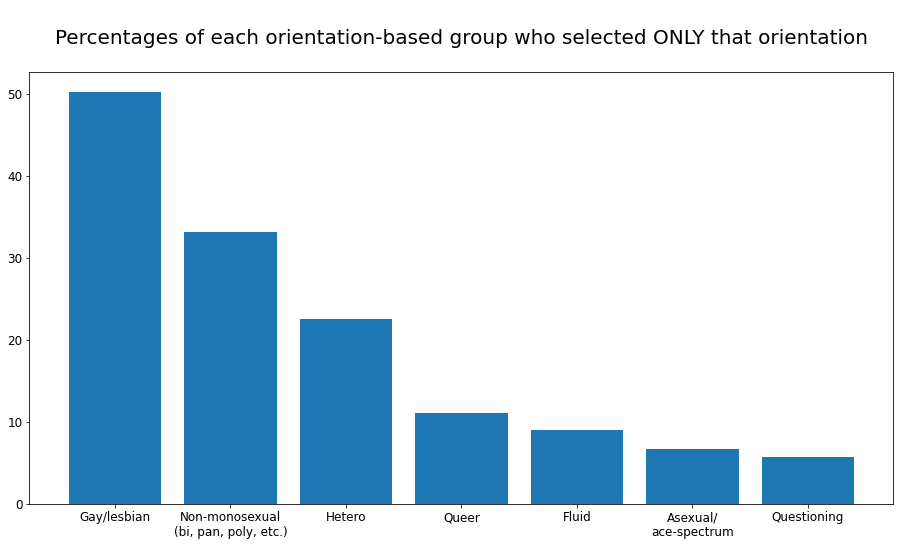

In [73]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
groups = ['Gay/lesbian', 'Non-monosexual\n(bi, pan, poly, etc.)', 'Hetero', 'Queer', 'Fluid', 'Asexual/\nace-spectrum', 'Questioning']
percentages = [50.2,33.2,22.6,11.1,9.0,6.7,5.7]
ax.bar(groups,percentages)

plt.tick_params(labelsize=12)
plt.title(label='\nPercentages of each orientation-based group who selected ONLY that orientation\n', size=20)
plt.show()